# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from missing_data import missing
from analyze_fraud_rate import analyze_fraud_by_hour
from train_and_evaluate import run_experiments
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Read Data

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Information about the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.shape

(284807, 31)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Data Pre-processing

## Check Missing values

In [12]:
missing(df)

Missing values in each column: 
Time: 0.0
V1: 0.0
V2: 0.0
V3: 0.0
V4: 0.0
V5: 0.0
V6: 0.0
V7: 0.0
V8: 0.0
V9: 0.0
V10: 0.0
V11: 0.0
V12: 0.0
V13: 0.0
V14: 0.0
V15: 0.0
V16: 0.0
V17: 0.0
V18: 0.0
V19: 0.0
V20: 0.0
V21: 0.0
V22: 0.0
V23: 0.0
V24: 0.0
V25: 0.0
V26: 0.0
V27: 0.0
V28: 0.0
Amount: 0.0
Class: 0.0


# Exloratory Data Analysis

## Amount

In [15]:
amt = df.groupby('Class')['Amount'].mean()
amt

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

Fradulent transactions may involve higher amounts of money. 

## Class 

In [18]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

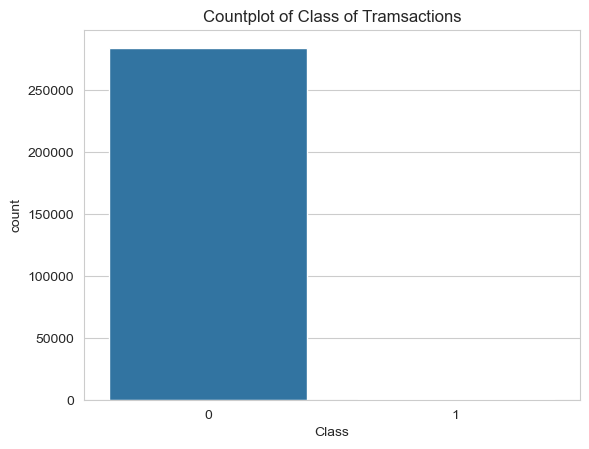

In [19]:
sns.countplot(data=df, x = 'Class')
plt.title('Countplot of Class of Tramsactions')
plt.show()

It seems there is a problem of class imbalance. We'll have to address this to avoid biased learning of any model.

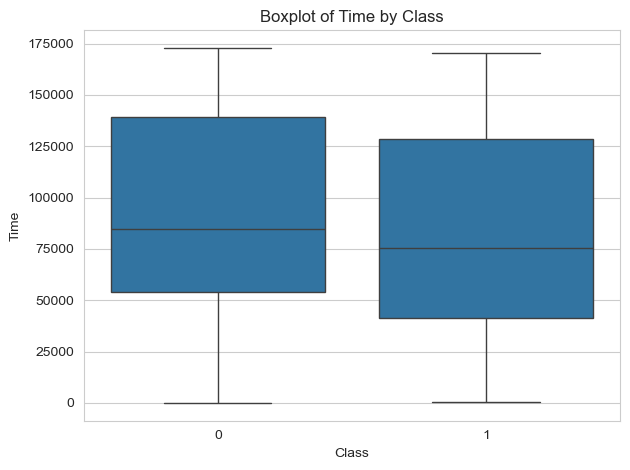

In [21]:
sns.boxplot(data=df, x='Class', y='Time')
plt.title('Boxplot of Time by Class')
plt.ylabel('Time')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

It seems fradulent transactions occur earlier than non-fradulent transactions. Let's explore this at hourly level.

## Time

In [23]:
df['Hour'] = (df['Time']%86400) // 3600

<Axes: xlabel='Hour', ylabel='Count'>

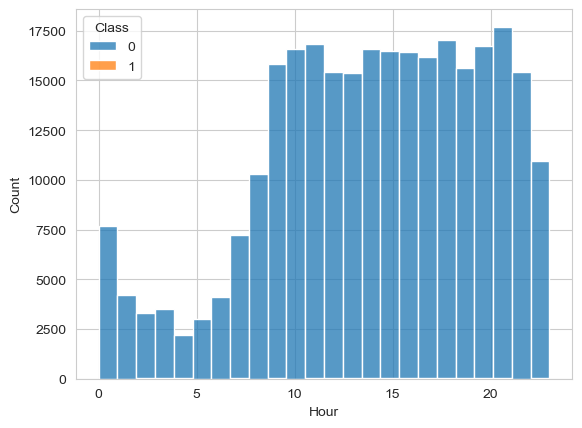

In [24]:
sns.histplot( x=df['Hour'], hue=df['Class'], multiple='stack', bins=24)

<Figure size 1000x600 with 0 Axes>

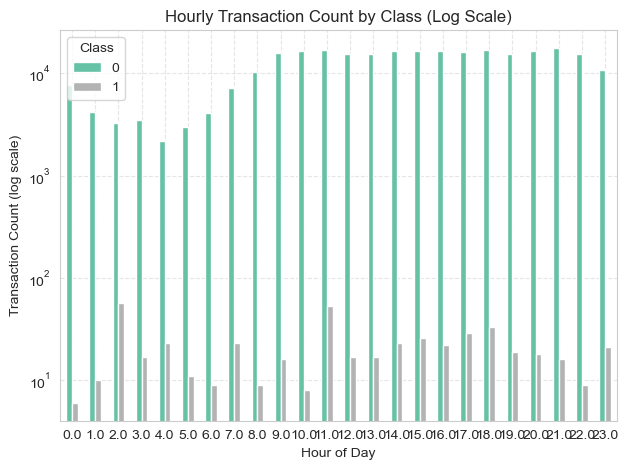

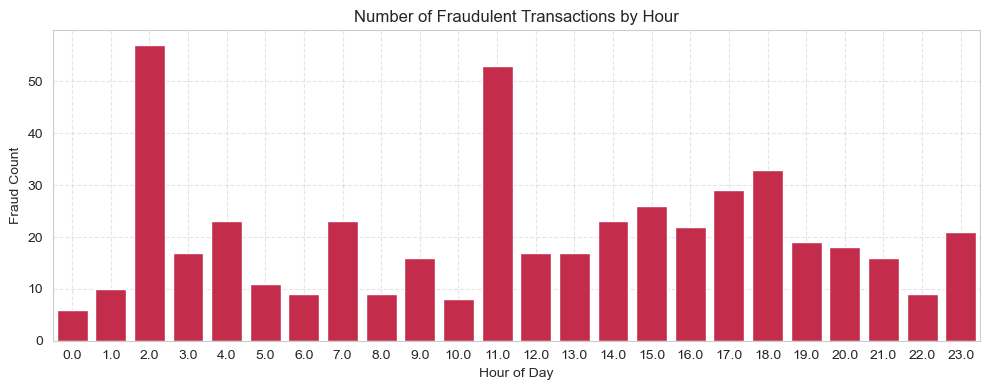

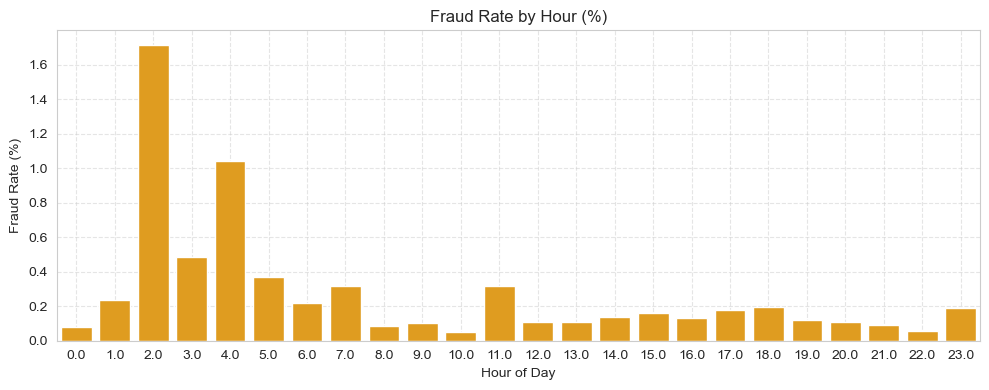

In [25]:
hourly_stats, fraud_rate = analyze_fraud_by_hour(df)

## Observations:

-  **High Fraud Rate between 2 AM and 5 AM**: 2 AM (Hour = 2) shows the peak fraud rate, exceeding 1.6% — significantly higher than other hours. Hours 3 AM and 4 AM also have elevated fraud rates (~0.5% to 1.0%). Suggests early morning hours are riskier for fraudulent activity.
-  **Low Fraud Rates in Daylight Hours**: From 8 AM to 10 PM, the fraud rate drops below 0.3%, remaining quite flat and low. Indicates fraud is less likely during typical business hours, when users and fraud detection systems may be more active.
-  **Slight Rise Around 11 AM and 4–6 PM**: There are minor upticks in fraud rate at around 11 AM and 4–6 PM, but these are small compared to the early morning spike. Might indicate secondary windows of vulnerability.

We can address these patterns into features as:

In [27]:
df['Suspicious_Hour'] = df['Hour'].isin([2, 3, 4, 11]).astype(int)
df['Is_Peak_Business'] = df['Hour'].isin(range(9, 18)).astype(int)

The fraud rate percentages can be used for each of the transactions based on the *'Hour'*, those transaction took place. The *Fraud_Density_Score* feature has been for depicting that.

In [29]:
fraud_rate_by_hour = {
        0: 0.1, 1: 0.25, 2: 1.7, 3: 0.5, 4: 1.05, 5: 0.35, 6: 0.22,
        7: 0.3, 8: 0.1, 9: 0.12, 10: 0.08, 11: 0.3, 12: 0.1, 13: 0.1,
        14: 0.12, 15: 0.15, 16: 0.13, 17: 0.18, 18: 0.2, 19: 0.13,
        20: 0.12, 21: 0.1, 22: 0.07, 23: 0.2
    }
    
df['Fraud_Density_Score'] = df['Hour'].map(fraud_rate_by_hour).fillna(0)

In [30]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Hour,Suspicious_Hour,Is_Peak_Business,Fraud_Density_Score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,0,0.1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0,0,0.1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,0,0,0.1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,0,0,0.1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,0,0,0.1


# Model Evaluation

In [32]:
evaluations = run_experiments(df)
evaluations.head()

,Method,Precision,Recall,F1-Score,ROC AUC,TN,FP,FN,TP
0,Class Weight Balanced,0.961039,0.755102,0.845714,0.957969,56861,3,24,74
1,SMOTE Oversampling,0.892473,0.846939,0.869110,0.968392,56854,10,15,83
2,Random Undersampling,0.045000,0.918367,0.085796,0.974063,54954,1910,8,90
3,Without Addressing Class Imbalance,0.952381,0.816327,0.879121,0.952806,56860,4,18,80


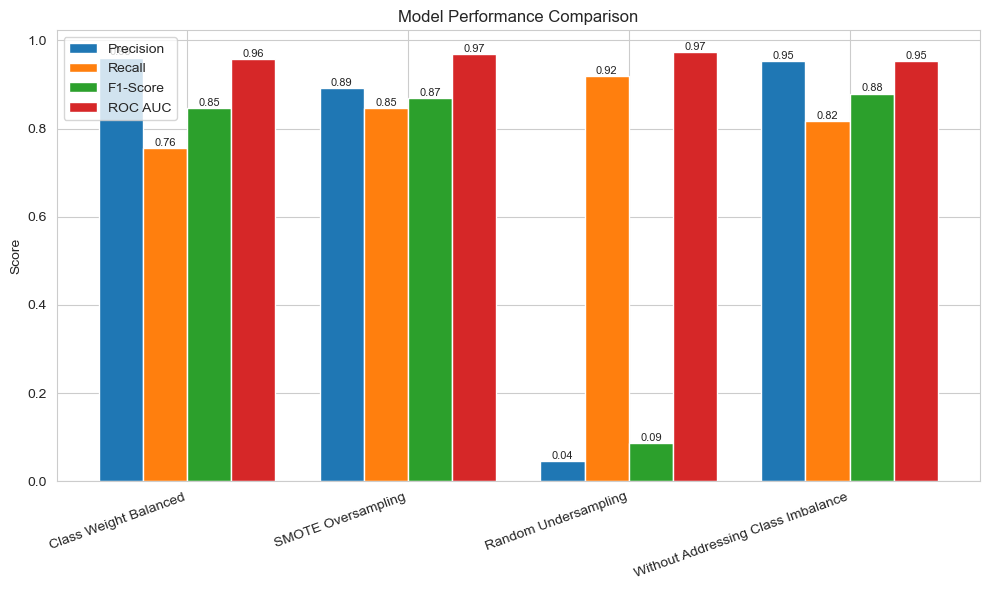

In [33]:
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC AUC']
x = np.arange(len(evaluations['Method']))  # positions for each method
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a group of bars
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, evaluations[metric], width, label=metric)

# X-axis formatting
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(evaluations['Method'], rotation=20, ha='right')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()

# Annotate bars with values
for i, metric in enumerate(metrics):
    for j, val in enumerate(evaluations[metric]):
        ax.text(j + i * width, val + 0.005, f"{val:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Results:

- **Without addressing class imbalance** wins if the main goal is **overall balance (F1) while keeping both precision and recall high**.

- **SMOTE is second-best**, especially if **ROC-AUC** is prioritized.

- **Class Weight Balanced** is third-best when precision is critical -- Great **precision**, but **recall drop pulls F1 down**.

- **Undersampling** should be avoided -- **huge false negatives**.

This kind of observation, where **classifier without addressing class imbalance** performs very **good**, may be unusual to see. However, it can happen because due to introduction of new features which makes the classifier find the minority class well without balancing. In other words, it can be said that, **the signal-to-noise ratio is high enough that imbalance isn't killing recall**.